In [1]:
#Setting up the environment and loading the dataset
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Define the path to the dataset
Housing_Prices_train = f'C:\\Users\\Rohan\\Desktop\\Rohan\\Kaggle\\Housing Prices Competition\\home-data-for-ml-course\\train.csv'
Housing_Prices_Y = f'C:\\Users\\Rohan\\Desktop\\Rohan\\Kaggle\\Housing Prices Competition\\home-data-for-ml-course\\train.csv'

# Load the dataset
home_data_train = pd.read_csv(Housing_Prices_train)
home_data_Y = pd.read_csv(Housing_Prices_Y)

In [2]:
home_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#feature engineering mean for int and mode for string
home_data_train['LotFrontage'] = home_data_train['LotFrontage'].fillna(home_data_train['LotFrontage'].mean())
home_data_train['MasVnrArea'] = home_data_train['MasVnrArea'].fillna(home_data_train['MasVnrArea'].mean())
home_data_train['BsmtQual'] = home_data_train['BsmtQual'].fillna(home_data_train['BsmtQual'].mode()[0])
home_data_train['BsmtCond'] = home_data_train['BsmtCond'].fillna(home_data_train['BsmtCond'].mode()[0])
home_data_train['BsmtExposure'] = home_data_train['BsmtExposure'].fillna(home_data_train['BsmtExposure'].mode()[0])
home_data_train['BsmtFinType1'] = home_data_train['BsmtFinType1'].fillna(home_data_train['BsmtFinType1'].mode()[0])
home_data_train['BsmtFinType2'] = home_data_train['BsmtFinType2'].fillna(home_data_train['BsmtFinType2'].mode()[0])
home_data_train['Electrical'] = home_data_train['Electrical'].fillna(home_data_train['Electrical'].mode()[0])
home_data_train['GarageType'] = home_data_train['GarageType'].fillna(home_data_train['GarageType'].mode()[0])
home_data_train['GarageFinish'] = home_data_train['GarageFinish'].fillna(home_data_train['GarageFinish'].mode()[0])
home_data_train['GarageArea'] = home_data_train['GarageArea'].fillna(home_data_train['GarageArea'].mean())
home_data_train['GarageQual'] = home_data_train['GarageQual'].fillna(home_data_train['GarageQual'].mode()[0])
home_data_train['GarageCond'] = home_data_train['GarageCond'].fillna(home_data_train['GarageCond'].mode()[0])
home_data_train['GarageYrBlt'] = home_data_train['GarageYrBlt'].fillna(home_data_train['GarageYrBlt'].mode()[0])
home_data_train['LotFrontage'] = home_data_train['LotFrontage'].fillna(home_data_train['LotFrontage'].mean())
home_data_train['MSZoning'] = home_data_train['MSZoning'].fillna(home_data_train['MSZoning'].mode()[0])
home_data_train['Utilities'] = home_data_train['Utilities'].fillna(home_data_train['Utilities'].mode()[0])
home_data_train['LotConfig'] = home_data_train['LotConfig'].fillna(home_data_train['LotConfig'].mode()[0])
home_data_train['RoofMatl'] = home_data_train['RoofMatl'].fillna(home_data_train['RoofMatl'].mode()[0])
home_data_train['Exterior1st'] = home_data_train['Exterior1st'].fillna(home_data_train['Exterior1st'].mode()[0])
home_data_train['Exterior2nd'] = home_data_train['Exterior2nd'].fillna(home_data_train['Exterior2nd'].mode()[0])
home_data_train['BsmtFinType1'] = home_data_train['BsmtFinType1'].fillna(home_data_train['BsmtFinType1'].mode()[0])
home_data_train['BsmtFinType2'] = home_data_train['BsmtFinType2'].fillna(home_data_train['BsmtFinType2'].mode()[0])
home_data_train['BsmtFinSF2'] = home_data_train['BsmtFinSF2'].fillna(home_data_train['BsmtFinSF2'].mode()[0])
home_data_train['BsmtUnfSF'] = home_data_train['BsmtUnfSF'].fillna(home_data_train['BsmtUnfSF'].mode()[0])
home_data_train['TotalBsmtSF'] = home_data_train['TotalBsmtSF'].fillna(home_data_train['TotalBsmtSF'].mode()[0])
home_data_train['BsmtFinSF1'] = home_data_train['BsmtFinSF1'].fillna(home_data_train['BsmtFinSF1'].mode()[0])
home_data_train['BsmtFullBath'] = home_data_train['BsmtFullBath'].fillna(home_data_train['BsmtFullBath'].mode()[0])
home_data_train['BsmtHalfBath'] = home_data_train['BsmtHalfBath'].fillna(home_data_train['BsmtHalfBath'].mode()[0])
home_data_train['Functional'] = home_data_train['Functional'].fillna(home_data_train['Functional'].mode()[0])
home_data_train['Fireplaces'] = home_data_train['Fireplaces'].fillna(home_data_train['Fireplaces'].mean())
home_data_train['GarageCars'] = home_data_train['GarageCars'].fillna(home_data_train['GarageCars'].mean())
home_data_train['SaleType'] = home_data_train['SaleType'].fillna(home_data_train['SaleType'].mode()[0])
home_data_train.drop(['Alley','PoolQC','Fence','MiscFeature','MasVnrType','FireplaceQu','Id'],axis=1,inplace=True)


<Axes: >

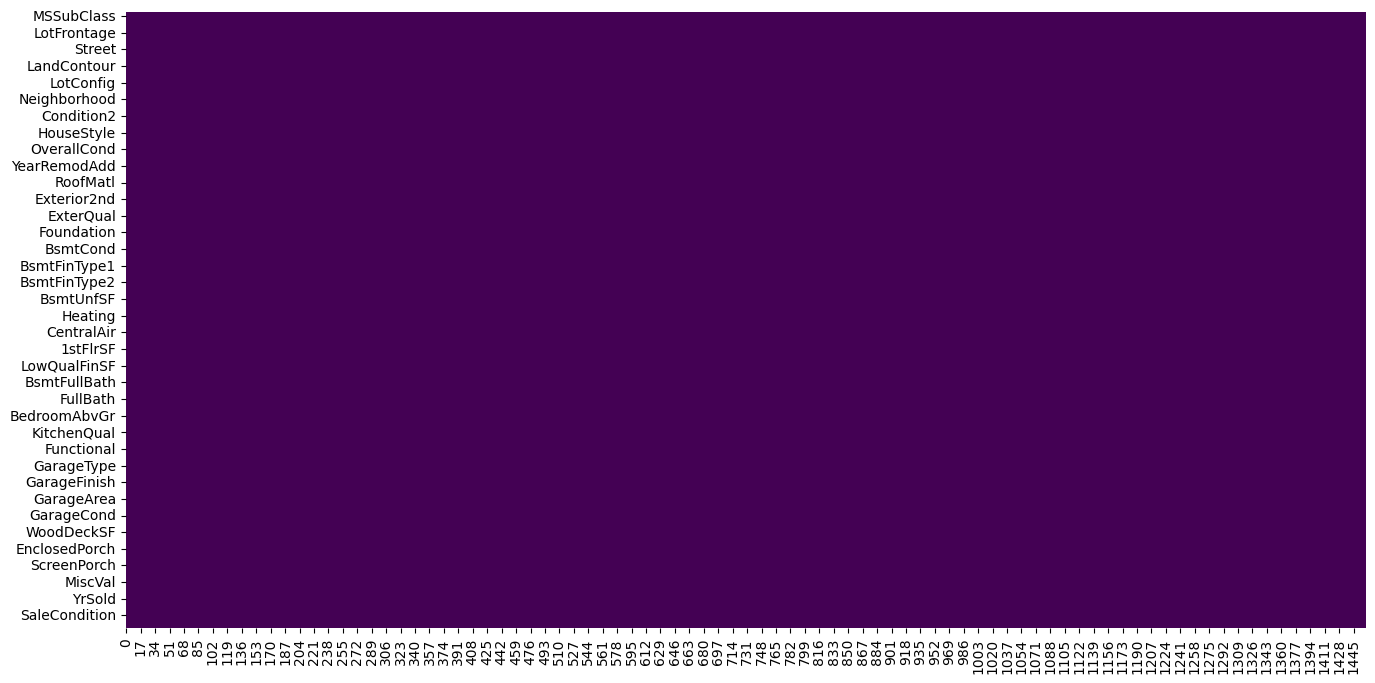

In [4]:
#Plotting missing values
plt.figure(figsize=(16, 8))
sns.heatmap(home_data_train.isnull().T, cbar=False, cmap='viridis')

In [5]:

print(home_data_train.isnull().sum())
feature_selection = home_data_train.drop(['SalePrice'], axis=1)
features = feature_selection.columns

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64


In [6]:
y = home_data_train.SalePrice
X = home_data_train[features]

In [7]:

#housing_model = DecisionTreeRegressor(random_state=1)
# Convert categorical columns to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

#define and train the Decision Tree model
housing_model = DecisionTreeRegressor(random_state=1)
housing_model.fit(X_encoded, y)
df_model = housing_model.predict(X_encoded)

# define and train the random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_encoded, y)
rf_model= rf_val_predictions = rf_model.predict(X_encoded)

#define and train the gradient boosting model
gb_model = GradientBoostingRegressor(random_state=1)
gb_model.fit(X_encoded, y)
gb_model = gb_model.predict(X_encoded)

#define and train the XGBoost model
xgb_model = XGBRegressor(random_state=1, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_encoded, y)
xgb_model_predictions = xgb_model.predict(X_encoded)


# # Now fit the model using X_encoded
# housing_model = DecisionTreeRegressor(random_state=1)
# housing_model.fit(X_encoded, y)
# df_model = housing_model.predict(X_encoded)



In [10]:
# Get predictions
rf_model_predictions = rf_model
df_model_predictions = df_model
gf_model_predictions = gb_model
xgb_model_predictions = xgb_model_predictions

# Combine predictions with the validation features
results = X_encoded.copy()
results['rfmodel'] = rf_model_predictions
results['dtmodel'] = df_model_predictions
results['gb_model'] = gf_model_predictions
results['xgb_model'] = xgb_model_predictions
results['ActualPrice'] = y.values

# Display the first few rows
results.head(20)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,rfmodel,dtmodel,gb_model,xgb_model,ActualPrice
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,205967.50,208500.0,201709.819937,204211.484375,208500
1,20,80.000000,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,174280.00,181500.0,167057.672445,176471.703125,181500
2,60,68.000000,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,222053.00,223500.0,207430.974532,215050.031250,223500
3,70,60.000000,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,False,154185.00,140000.0,164710.065901,142968.500000,140000
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,271504.94,250000.0,288684.185778,258524.484375,250000
5,50,85.000000,14115,5,5,1993,1995,0.0,732,0,...,False,False,False,True,False,146444.15,143000.0,149313.254633,144100.515625,143000
6,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,...,False,False,False,True,False,302959.02,307000.0,296800.301271,305137.750000,307000
7,60,70.049958,10382,7,6,1973,1973,240.0,859,32,...,False,False,False,True,False,213548.60,200000.0,222672.241600,207624.843750,200000
8,50,51.000000,6120,7,5,1931,1950,0.0,0,0,...,False,False,False,False,False,142039.00,129900.0,141672.835786,129259.562500,129900
9,190,50.000000,7420,5,6,1939,1950,0.0,851,0,...,False,False,False,True,False,118166.25,118000.0,124457.535608,117393.515625,118000


In [ ]:
print("Mean of Actual Prices:",rf_model.mean())
print("Mean of Actual Prices:",df_model.mean())
print("Mean of Actual Prices:",gb_model.mean())
print("Mean of Actual Prices:",y.values.mean())

Mean of Actual Prices: 181024.83871917805
Mean of Actual Prices: 180921.19589041095
Mean of Actual Prices: 180921.19589041095
Mean of Actual Prices: 180921.19589041095


: 

In [576]:
Housing_Prices_test = f'C:\\Users\\Rohan\\Desktop\\Rohan\\Kaggle\\Housing Prices Competition\\home-data-for-ml-course\\test.csv'
Housing_Prices_test_y = f'C:\\Users\\Rohan\\Desktop\\Rohan\\Kaggle\\Housing Prices Competition\\home-data-for-ml-course\\test1.csv'
home_data_test = pd.read_csv(Housing_Prices_test)
home_data_test_y = pd.read_csv(Housing_Prices_test_y)
#home_data_test['SalesPrice'] = 1


In [577]:
#feature engineering mean for int and mode for string
home_data_test['LotFrontage'] = home_data_test['LotFrontage'].fillna(home_data_test['LotFrontage'].mean())
home_data_test['MasVnrArea'] = home_data_test['MasVnrArea'].fillna(home_data_test['MasVnrArea'].mean())
home_data_test['BsmtQual'] = home_data_test['BsmtQual'].fillna(home_data_test['BsmtQual'].mode()[0])
home_data_test['BsmtCond'] = home_data_test['BsmtCond'].fillna(home_data_test['BsmtCond'].mode()[0])
home_data_test['BsmtExposure'] = home_data_test['BsmtExposure'].fillna(home_data_test['BsmtExposure'].mode()[0])
home_data_test['BsmtFinType1'] = home_data_test['BsmtFinType1'].fillna(home_data_test['BsmtFinType1'].mode()[0])
home_data_test['BsmtFinType2'] = home_data_test['BsmtFinType2'].fillna(home_data_test['BsmtFinType2'].mode()[0])
home_data_test['Electrical'] = home_data_test['Electrical'].fillna(home_data_test['Electrical'].mode()[0])
home_data_test['GarageType'] = home_data_test['GarageType'].fillna(home_data_test['GarageType'].mode()[0])
home_data_test['GarageFinish'] = home_data_test['GarageFinish'].fillna(home_data_test['GarageFinish'].mode()[0])
home_data_test['GarageArea'] = home_data_test['GarageArea'].fillna(home_data_test['GarageArea'].mean())
home_data_test['GarageQual'] = home_data_test['GarageQual'].fillna(home_data_test['GarageQual'].mode()[0])
home_data_test['GarageCond'] = home_data_test['GarageCond'].fillna(home_data_test['GarageCond'].mode()[0])
home_data_test['GarageYrBlt'] = home_data_test['GarageYrBlt'].fillna(home_data_test['GarageYrBlt'].mode()[0])
home_data_test['LotFrontage'] = home_data_test['LotFrontage'].fillna(home_data_test['LotFrontage'].mean())
home_data_test['MSZoning'] = home_data_test['MSZoning'].fillna(home_data_test['MSZoning'].mode()[0])
home_data_test['Utilities'] = home_data_test['Utilities'].fillna(home_data_test['Utilities'].mode()[0])
home_data_test['LotConfig'] = home_data_test['LotConfig'].fillna(home_data_test['LotConfig'].mode()[0])
home_data_test['RoofMatl'] = home_data_test['RoofMatl'].fillna(home_data_test['RoofMatl'].mode()[0])
home_data_test['Exterior1st'] = home_data_test['Exterior1st'].fillna(home_data_test['Exterior1st'].mode()[0])
home_data_test['Exterior2nd'] = home_data_test['Exterior2nd'].fillna(home_data_test['Exterior2nd'].mode()[0])
home_data_test['BsmtFinType1'] = home_data_test['BsmtFinType1'].fillna(home_data_test['BsmtFinType1'].mode()[0])
home_data_test['BsmtFinType2'] = home_data_test['BsmtFinType2'].fillna(home_data_test['BsmtFinType2'].mode()[0])
home_data_test['BsmtFinSF2'] = home_data_test['BsmtFinSF2'].fillna(home_data_test['BsmtFinSF2'].mode()[0])
home_data_test['BsmtUnfSF'] = home_data_test['BsmtUnfSF'].fillna(home_data_test['BsmtUnfSF'].mode()[0])
home_data_test['TotalBsmtSF'] = home_data_test['TotalBsmtSF'].fillna(home_data_test['TotalBsmtSF'].mode()[0])
home_data_test['BsmtFinSF1'] = home_data_test['BsmtFinSF1'].fillna(home_data_test['BsmtFinSF1'].mode()[0])
home_data_test['BsmtFullBath'] = home_data_test['BsmtFullBath'].fillna(home_data_test['BsmtFullBath'].mode()[0])
home_data_test['BsmtHalfBath'] = home_data_test['BsmtHalfBath'].fillna(home_data_test['BsmtHalfBath'].mode()[0])
home_data_test['Functional'] = home_data_test['Functional'].fillna(home_data_test['Functional'].mode()[0])
home_data_test['Fireplaces'] = home_data_test['Fireplaces'].fillna(home_data_test['Fireplaces'].mean())
home_data_test['GarageCars'] = home_data_test['GarageCars'].fillna(home_data_test['GarageCars'].mean())
home_data_test['SaleType'] = home_data_test['SaleType'].fillna(home_data_test['SaleType'].mode()[0])
home_data_test.drop(['Alley','PoolQC','Fence','MiscFeature','MasVnrType','FireplaceQu'],axis=1,inplace=True)

In [578]:
home_data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,...,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,...,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,...,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,...,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,...,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [579]:
#y = home_data_test_y.SalePrice
X = home_data_test[features]
test_encoded = pd.get_dummies(X)

In [580]:
X_encoded, test_encoded = X_encoded.align(test_encoded, join='left', axis=1, fill_value=0)
rf_model_on_full_data = DecisionTreeRegressor(random_state=1)
rf_model_on_full_data.fit(X_encoded, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [581]:
test_preds = rf_model_on_full_data.predict(test_encoded)

In [582]:
output = pd.DataFrame({
    'Id': home_data_test.index + 1461,  # or use home_data_test['Id'] if available
    'SalePrice': test_preds
})


In [583]:
output.to_csv('submission.csv', index=False)